In [32]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

In [8]:
file_path = r'C:\Users\Dell\Documents\GitHub\PINNS_OPF\opf\data\raw\acndata_sessions.json'
with open(file_path, 'r') as f:
    file_contents = f.read()
    data_ev = json.loads(file_contents)

In [9]:
data_ev = data_ev['_items']
df_ev = pd.DataFrame(data_ev)

In [12]:
# Assuming your dataframe is named "df"
df_ev['connectionTime'] = pd.to_datetime(df_ev['connectionTime'])
df_ev['disconnectTime'] = pd.to_datetime(df_ev['disconnectTime'])
df_ev['doneChargingTime'] = pd.to_datetime(df_ev['doneChargingTime'])

In [15]:
df_ev.head()

,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,5bc90cb9f9af8b0d7fe77cd2,0039,2018-04-25 11:08:04+00:00,2018-04-25 13:20:10+00:00,2018-04-25 13:21:10+00:00,7.932,2_39_78_362_2018-04-25 11:08:04.400812,0002,CA-496,2-39-78-362,America/Los_Angeles,None,None
1,5bc90cb9f9af8b0d7fe77cd3,0039,2018-04-25 13:45:10+00:00,2018-04-26 00:56:16+00:00,2018-04-25 16:44:15+00:00,10.013,2_39_95_27_2018-04-25 13:45:09.617470,0002,CA-319,2-39-95-27,America/Los_Angeles,None,None
2,5bc90cb9f9af8b0d7fe77cd4,0039,2018-04-25 13:45:50+00:00,2018-04-25 23:04:45+00:00,2018-04-25 14:51:44+00:00,5.257,2_39_79_380_2018-04-25 13:45:49.962001,0002,CA-489,2-39-79-380,America/Los_Angeles,None,None
3,5bc90cb9f9af8b0d7fe77cd5,0039,2018-04-25 14:37:06+00:00,2018-04-25 23:55:34+00:00,2018-04-25 16:05:22+00:00,5.177,2_39_79_379_2018-04-25 14:37:06.460772,0002,CA-327,2-39-79-379,America/Los_Angeles,None,None
4,5bc90cb9f9af8b0d7fe77cd6,0039,2018-04-25 14:40:34+00:00,2018-04-25 23:03:12+00:00,2018-04-25 17:40:30+00:00,10.119,2_39_79_381_2018-04-25 14:40:33.638896,0002,CA-490,2-39-79-381,America/Los_Angeles,None,None


In [29]:
df_ev['duration'] = ((df_ev['disconnectTime'] - df_ev['connectionTime'])/ np.timedelta64(1, 'h')).round(decimals=0)

<BarContainer object of 20 artists>

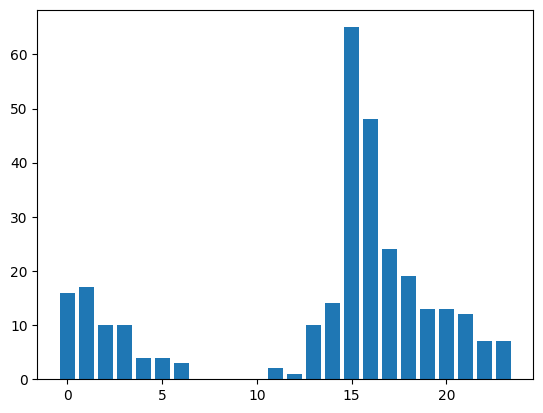

In [37]:
start_charge_time = df_ev.groupby(df_ev['connectionTime'].dt.hour)['_id'].count()
plt.bar(start_charge_time.index,start_charge_time)

<BarContainer object of 24 artists>

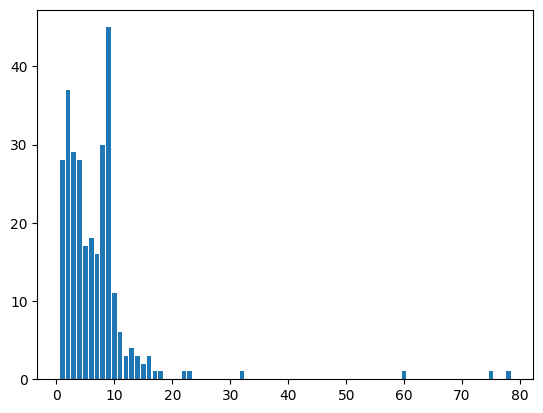

In [36]:
duration_time = df_ev.groupby(df_ev['duration'])['_id'].count()
plt.bar(duration_time.index[1:],duration_time.values[1:])